In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [3]:
df_rf = pd.read_csv("df_thc_lsa.csv")

In [4]:
df_rf

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,anxious,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Delta9-THC
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.259712
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.259712
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.259712
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.259712
4,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.259712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557


In [5]:
df_rf.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'woody',
 'X..D

Splitting dependent and independent variables

In [6]:
X = df_rf.drop(['X..Delta9-THC'], axis = 1)
y = df_rf[['X..Delta9-THC']]

Plotting histograms on target variable

In [8]:
y_array = y.to_numpy()
y_array

array([[0.25971245],
       [0.25971245],
       [0.25971245],
       ...,
       [0.56255736],
       [0.56255736],
       [0.56255736]])

<AxesSubplot:ylabel='Count'>

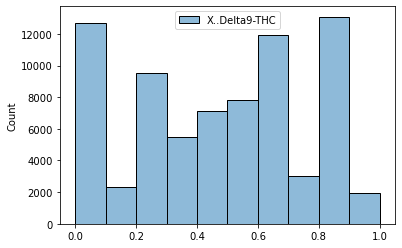

In [9]:
sns.histplot(y, bins = 10)

Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [11]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [12]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_11883/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [13]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [14]:
mean_absolute_error(y_val, y_pred_rfreg)

0.058768143938891744

In [15]:
mean_squared_error(y_val, y_pred_rfreg)

0.012256266119816572

In [16]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11070802193073712

In [17]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9645212317971562

In [18]:
#val
r2_score(y_val, y_pred_rfreg)

0.851490569891552

Residual plots for each target variable

Feature Selection

In [19]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [20]:
df_feat

,features,score
0,lsa_0,0.130599
1,lsa_1,0.120140
2,lsa_2,0.127144
3,lsa_3,0.117640
4,lsa_4,0.122074
...,...,...
81,tree,0.001101
82,tropical,0.002854
83,vanilla,0.006075
84,violet,0.000466


In [21]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [22]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
0,lsa_0,1.305989e-01
2,lsa_2,1.271435e-01
4,lsa_4,1.220742e-01
1,lsa_1,1.201399e-01
3,lsa_3,1.176396e-01
50,diesel,2.789599e-02
7,sativa,2.787680e-02
64,orange,1.891444e-02
30,relaxed,1.267395e-02
51,earthy,1.249844e-02


In [23]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [24]:
selector.estimator_.feature_importances_

array([1.27359559e-01, 1.18041789e-01, 1.28094855e-01, 1.19393239e-01,
       1.24665834e-01, 1.14090877e-02, 1.07825579e-02, 2.79191495e-02,
       8.45893128e-05, 1.95978419e-03, 9.06357231e-03, 6.54614287e-06,
       8.08877369e-03, 1.04313032e-04, 3.85709248e-03, 6.61879297e-03,
       8.53207652e-03, 7.45443359e-03, 2.25505821e-06, 9.79262230e-03,
       2.37147979e-06, 5.90855508e-06, 7.68551762e-03, 6.72774888e-03,
       1.01294169e-02, 2.53459177e-03, 9.62417318e-03, 1.04199603e-04,
       3.46509533e-06, 2.26972447e-03, 1.27692856e-02, 4.28833463e-06,
       1.15563184e-02, 0.00000000e+00, 4.22794746e-07, 5.71016092e-03,
       6.40019863e-03, 9.12952121e-03, 1.59672833e-03, 4.00182067e-04,
       6.63303689e-04, 5.61819224e-03, 2.14625700e-04, 4.98632455e-03,
       1.36914389e-03, 1.00868418e-02, 1.56173216e-03, 2.84872399e-04,
       6.32426402e-03, 1.30723673e-03, 2.83741158e-02, 1.25700771e-02,
       3.17115996e-03, 1.19639123e-03, 7.65895145e-03, 1.42210443e-03,
      

In [25]:
selector.threshold_

0.011627906976744186

In [26]:
mask = selector.get_support()

In [27]:
mask

array([ True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [28]:
selected_features = X.columns[mask]

In [29]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,sativa,relaxed,diesel,earthy,lemon,orange,sweet
0,0.341025,0.182753,0.008214,0.140406,-0.156943,0,1,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,1,0,0,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,0,0,0,0,0,0,1
3,0.243491,0.034313,0.080290,-0.165609,0.019773,0,1,0,0,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,0,0
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [30]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_thc.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_thc.pkl")

['selected_X_rf_lsa_elbow_thc.pkl']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [32]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [33]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_11883/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [34]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06341846854055548

In [35]:
mean_squared_error(y_val, y_pred_rfreg)

0.01384480853150437

In [36]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11766396445600653

In [37]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9513606694724311

In [38]:
#val
r2_score(y_val, y_pred_rfreg)

0.8314337884438647

Hyperparameter Tuning

In [39]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [40]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [41]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ens

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [42]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [43]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_thc.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_thc.pkl")

['rscv_rf_lsa_elbow_best_params_thc.pkl']

RF (after Hyperparameter Tuning)

In [44]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_11883/2143269374.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [45]:
mean_absolute_error(y_val, y_pred_rfreg)

0.0632013608952759

In [46]:
mean_squared_error(y_val, y_pred_rfreg)

0.01350104018206182

In [47]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11619397653089346

In [48]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9518964892116502

In [49]:
#val
r2_score(y_val, y_pred_rfreg)

0.835619308827666

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [50]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [51]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_thc.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_thc.pkl")

['y_test_rfreg_lsa_elbow_thc.pkl']

In [52]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.06099702451049167

In [53]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.012845422894384872

In [54]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.11333764994204208

In [55]:
r2_score(y_test, y_pred_rfreg_test)

0.8439008786658198

Error analysis

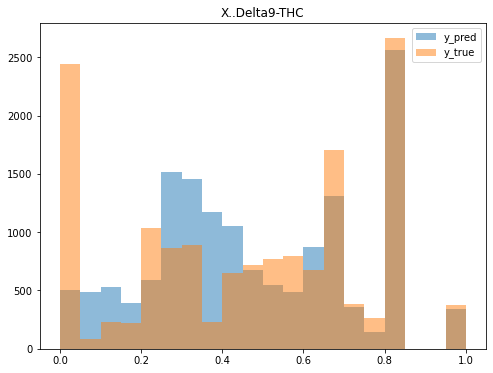

<Figure size 432x288 with 0 Axes>

In [56]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Delta9-THC"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_thc.png')

Pearson R

In [57]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.921
P-value: 0.000


<AxesSubplot:>

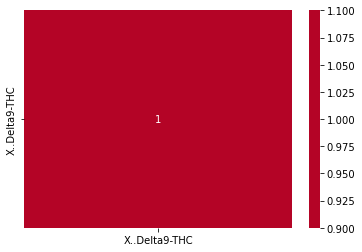

In [58]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)